# Linear Regression and Correlation

## Challenge 1

You are the owner of a big company and you suspect that the younger your employees are, the most likely it is that they don't come to work. In order to prove this hypothesis, you have gathered some data:

| EmployeeID | Age | Absences |
|--------|-----|------------|
| 1      | 27  | 15         |
| 2      | 61  | 6          |
| 3      | 37  | 10         |
| 4      | 23  | 18         |
| 5      | 46  |  9         |
| 6      | 58  |  7         |
| 7      | 29  | 14         |
| 8      | 36  | 11         |
| 9      | 64  |  5         |
| 10     | 40  |  8         |

You can find this information in the `data` folder of the present repository. 

Import the necessary libraries to complete the lab here:

In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
data = pd.read_csv('../data/absences.csv')
data.head()

,Unnamed: 0,EmployeeID,Age,Absences
0,0,1,27,15
1,1,2,61,6
2,2,3,37,10
3,3,4,23,18
4,4,5,46,9


#### 1. Plot the scatter chart of `Age` and `Absences`. Comment the result. Do you see any relation between `Age` and `Absences`?

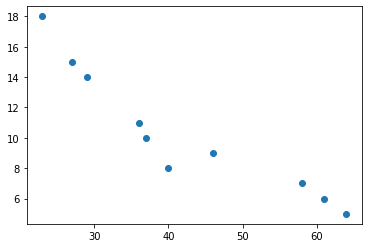

In [3]:
# your code here
plt.scatter(data.Age, data.Absences)

In [4]:
"""The assumption is accurate"""

'The assumption is accurate'

#### 2.- Define a function to calculate the slope and intercept of the regression line for two variables. Your are not allowed to use any functions or methods that directly calculate those parameters.

In [5]:
def slope(x,y):
    numerator = 0
    denominator = 0
    mean_x = sum(x)/len(x) 
    mean_y = sum(y)/len(y) 
    for i,j in zip(x,y):
        numerator += ((j-mean_y)*(i-mean_x))
        denominator += (i-mean_x)**2
    return numerator/denominator

def intercept(x,y,m):
    mean_x = sum(x)/len(x)
    mean_y = sum(y)/len(y)
    return mean_y - m*mean_x

#### 3.- Use the function you defined in step 2 to calculate the regression line for `Age` and `Absences`. Plot it and comment your results.

In [6]:
#Y= a + bX

In [7]:
abs_slope = slope(data.Age, data.Absences)
abs_slope

-0.2681088337033404

In [8]:
abs_intercept = intercept(data.Age, data.Absences, abs_slope)
abs_intercept 

21.58738189891063

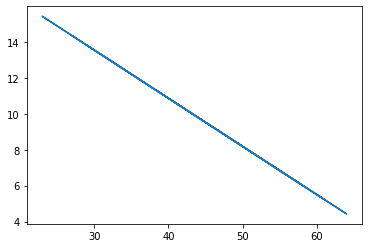

In [9]:
# your code here
plt.plot(data.Age, data.Age*abs_slope + abs_intercept)

In [10]:
# your comments here


#### 4.- Define a function to calculate the covariance and the correlation of two variables.

In [11]:
# your code here
def covariance(x, y):
    numerator = 0
    denominator = 0
    mean_x = sum(x)/len(x) 
    mean_y = sum(y)/len(y) 
    for i,j in zip(x,y):
        numerator += ((j-mean_y)*(i-mean_x))
        denominator = len(x)
    return numerator/denominator

In [12]:
def correlation(x,y):
    return covariance(x,y) / (x.std() * y.std())


#### 5.- Use the function you defined in step 4 to calculate the covariance and the correlation of `Age` and `Absences`. Compare them and comment.

In [15]:
# your code here
cov = covariance(data.Age, data.Absences)
corr = correlation(data.Age, data.Absences)
print(f'The covariance is {cov}, and the correlation is {corr}')

The covariance is -51.92999999999999, and the correlation is -0.839289068323291


In [ ]:
# There is a strong negative correlation between age and absences, meaning the less value has one of them, the more value has the other.

#### 6.- Summarize your results, interpret them and give some insights. Can you confirm that the age is an indicator of absenteeism?

In [ ]:
# your comments here
# There is a clear correlation between less age and more absententeeism.

## Challenge 2

Good Ironhackers stay in campus on Fridays for Ironbeers. You suspect that the more people you tell to stay, the most likely it is that they don't. You want to know if you are the reason why people don't stay so you decide to do an analysis. 

X is the number of people that you told to stay and Y is the number of people that actually stayed.

| X | Y |
|---|---|
| 1 | 1 |
| 3 | 2 |
| 4 | 4 |
| 6 | 4 |
| 8 | 5 |
| 9 | 7 |
| 11 |8 |
| 14 | 9 |

Use the following command to create a dataframe with the data about Ironbeers attendance:

In [18]:
ironbeers_df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,9]})

#### 1.- Calculate the covariance and the correlation of `X` and `Y`. Comment on the results.

In [19]:
# your code here
cov = covariance(ironbeers_df.X, ironbeers_df.Y)
corr = correlation(ironbeers_df.X, ironbeers_df.Y)
print(f'The covariance is {cov}, and the correlation is {corr}')

The covariance is 10.5, and the correlation is 0.8548823683035951


In [ ]:
# It seems there is a positive correlation between the people I told to stay and those who stayed

#### 2.- Plot the scatter chart of `X` and `Y`. Comment on the results.

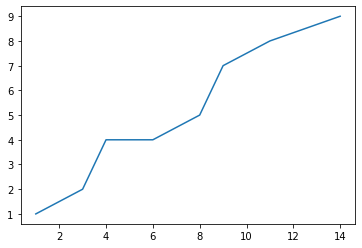

In [20]:
# your code here
plt.plot(ironbeers_df.X, ironbeers_df.Y)

In [ ]:
# There is a positive correlation between invitations and attendance.

#### 3.- Calculate the regression line for `X` and `Y`. Commment on the results.

In [23]:
# Slope
slope_ironbeers = slope(ironbeers_df.X, ironbeers_df.Y)
slope_ironbeers

0.6363636363636364

In [24]:
intercept(ironbeers_df.X, ironbeers_df.Y,slope_ironbeers)

0.5454545454545459

In [ ]:
#The growth of people staying in Ironbeers follows a relation of 0.54 per Ironbeers.
#The slope shows that per every person I invite 0.63 join Ironbeers.

#### 4.- What is your conclusion? Are you the reason why people is not staying on Fridays?

In [ ]:
"""I don't seem to deter people from staying in Ironbeers, though I can't assure they're staying because of me and,
certainly, the more I spread the word, higher is the number of attendants."""


## Bonus Challenge: Error Analysis

You are going to do an analysis to check whether two random variables fit into a linear regression or not.

In this challenge, you are asked to do an error analysis using the data in **challenge 2**. An "error" is the difference between the expected value of an observation (the regression line value) and the actual value.

#### 1.- First create a new column `expected_Y` in `ironbeers_df` to store the expected `Y` value for each `X`.
**Hint**: You get the expected `Y` by evaluating the regression line for each `X`.

In [ ]:
# your code here

#### 2.- Create a new column `error` in `ironbeers_df` to store the error between the actual and expected values of `Y`. Plot the scatter chart of `X` and `error`.

In [ ]:
# your code here

#### 3.- The closer the points to zero, the best the actual values fit the linear regression. Comment the plot above. Do you see any particular points with a high error?

In [ ]:
# your comments here

#### 4.- Remove the points with a high error and recalculate the regression line.

In [ ]:
# your code here

#### 5.- Calculate the correlation. What is happening? Comment the result.

In [ ]:
# your code here

In [ ]:
# your comments here